# Simple Linear Regression
In this example we discuss the basics of simple linear regression. We try to model sales of a product with the amount of money spent for TV, radio and newspaper ads.
This notebook is structured as follows:
1. exploratiove analysis
2. linear regression
3. regression analysis

In [7]:
# load packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# loading data
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## 1. explorative analysis 

In [14]:
# compute some metrics of the variables
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Average or mean
The arethmic mean $\bar{x}$ of n observations of a random variable X can be computed as:
$$\bar{x} = 1/n \sum_i x_i$$.
Some properties are:
- non robust statistic (influenced by outliers)
- resudials sum up to zero: $r = \sum_i (x_i - \bar{x}) = 0$ $\rightarrow$ The numbers to the left of the mean are balanced by the numbers to the right 


### Variance
The Variance measures how far a set of (random) variables are spread out from their average value. 

$$\sigma^2 = \frac{1}{n}\sum_i (x_i - \bar{x})^2$$

The more general definition is:
$$Var(X) = \sigma^2 = E[(X - E[X])^2]$$

It is also known as the second central moment:

### Central Moment
$$\mu_n = E[(X - E[X])^n] = \int (x - \mu)^n f(x) dx $$
or for discrete distributions it is
$$\sum (x_i - \mu)^n p_i $$
Now if every event is equally likely, i.e. $p_i = 1/n$ with n being the number of different events, we get for the first and second central moment:
$$ \frac{1}{n} \sum (x_i - \mu) = 0 $$
and 
$$ \frac{1}{n} \sum (x_i - \mu)^2 = \sigma^2  $$

In [15]:
# variance
df.var()

TV           7370.949893
radio         220.427743
newspaper     474.308326
sales          27.221853
dtype: float64

In [52]:
((df['sales'] - df['sales'].mean())**2).sum() * 1/(len(df))

27.08574374999999

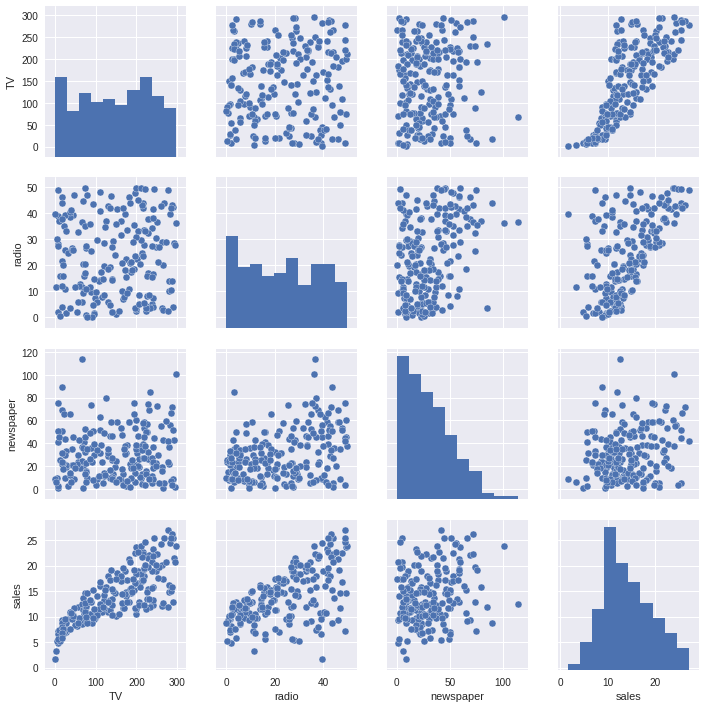

In [9]:
# pairplot
sns.pairplot(data=df)

## Linear Regression with sklearn
Now we start to build a linear model with sklearn.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()

In [20]:
features = df.drop(['sales'],axis=1)
target= df.sales

In [21]:
lm.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
df['pred'] = lm.predict(features)

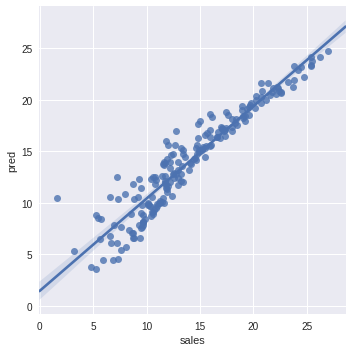

In [24]:
sns.lmplot(data=df, x='sales', y='pred')

In [25]:
lm.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [30]:
lm.intercept_

2.9388893694594067

In [29]:
lm.predict([[0,0,0]])

array([ 2.93888937])

### 3. Analyze the results
Next we use the decomposition of the variance:
$$
\begin{aligned}
SQT= \sum (y_i - \bar{y})^2 &= \sum (y_i - \hat{y}_i)^2 + \sum(\hat{y}_i - \bar{y})^2 \\
&= SQR + SQE 
\end{aligned}
$$

In [47]:
# Decomposition of the Variance
# SQR
SQR = ((df['pred'] - df['sales'])**2).sum()
SQE = ((df['pred'] - df['sales'].mean())**2).sum()
SQT = ((df['sales'] - df['sales'].mean())**2).sum()

In [48]:
print(SQR)
print(SQE)
print(SQT)

print(SQT - SQR - SQE)

556.8252629021869
4860.32348709782
5417.148749999998
-1.000444171950221e-11


In [55]:
# unbiased variance
df['sales'].var() * (len(df)-1)

5417.148749999998

### Coefficient of Determination
$$ R^2 = \frac{SQE}{SQT} = 1 - \frac{SQR}{SQT}  $$

This is the fraction of the sum of squared explained to the sum of squares total. This is actually the same as the squared correlation Pearson-Bravais Correlation coefficients.

In [60]:
def r2(true, pred):
    SQR = ((true - pred)**2).sum()
    SQT = true.var() * (len(true) - 1)
    return 1 - SQR / SQT

In [61]:
r2(df['sales'], df['pred'])

0.8972106381789522

In [62]:
def r2_bar(true, pred, p):
    return 1-(1-r2(true,pred)) * (len(true) - 1) / (len(true) - p) 
    

In [65]:
# Henri Theil
r2_bar(df['sales'], df['pred'], 3)

0.896167091358434

In [70]:
df.corr()**2

,TV,radio,newspaper,sales,pred
TV,1.000000,0.003004,0.003209,0.611875,0.681975
radio,0.003004,1.000000,0.125389,0.332032,0.370072
newspaper,0.003209,0.125389,1.000000,0.052120,0.058092
sales,0.611875,0.332032,0.052120,1.000000,0.897211
pred,0.681975,0.370072,0.058092,0.897211,1.000000


In [73]:
lm.fit(df['TV'].reshape(200,-1), df['sales'])

/home/jodahr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
lm.score(df['TV'].reshape(200,-1), df['sales'])

/home/jodahr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


0.61187505085007099